### Import, pickle and comparison of proteomes

In [1]:
%matplotlib inline
import os.path
import pandas as pd
import cPickle as pkl
import csv
import xlrd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')

from statsmodels.nonparametric.smoothers_lowess import lowess

datadir = "../../data"

/home/martin/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Consensus proteome according to Pax-DB (http://pax-db.org/data/abundances/4932-WHOLE_ORGANISM-integrated.txt):

```
@article{wang2012paxdb,
  title={PaxDb, a database of protein abundance averages across all three domains of life},
  author={Wang, Mingcong and Weiss, Manuel and Simonovic, Milan and Haertinger, Gabriele and Schrimpf, Sabine P and Hengartner, Michael O and von Mering, Christian},
  journal={Molecular \& Cellular Proteomics},
  volume={11},
  number={8},
  pages={492--500},
  year={2012},
  url={http://www.mcponline.org/content/11/8/492.long}
  publisher={ASBMB}
}```

In [2]:
prot_paxdb_file = '4932-S.cerevisiae_whole_organism-integrated_dataset.txt'
prot_paxdb_path = os.path.join(datadir, prot_paxdb_file)

with open(prot_paxdb_path, mode='r') as infile:
    lines = infile.readlines()[9:]
    lines = [(line.split()[1], line.split()[2]) for line in lines]
    prot_paxdb = dict((line[0].split('.')[1], float(line[1])) for line in lines)

In [3]:
pd.Series(prot_paxdb).describe()

count     6159.000000
mean       162.364020
std        843.292868
min          0.000303
25%          1.759430
50%         10.582627
75%         53.385761
max      24556.397666
dtype: float64

Proteome according to Brockmann (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.0030057#s5):

```
@article{brockmann2007posttranscriptional,
  title={Posttranscriptional expression regulation: what determines translation rates?},
  author={Brockmann, Regina and Beyer, Andreas and Heinisch, J{\"u}rgen J and Wilhelm, Thomas},
  journal={PLoS computational biology},
  volume={3},
  number={3},
  pages={e57},
  year={2007},
  url={http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.0030057}
  publisher={Public Library of Science}
}
```

In [4]:
prot_brockmann_file = 'journal.pcbi.0030057.st001.XLS'
prot_brockmann_path = os.path.join(datadir, prot_brockmann_file)

workbook = xlrd.open_workbook(prot_brockmann_path)
worksheet = workbook.sheet_by_name('Table S1')
num_rows = worksheet.nrows - 1
num_cells = worksheet.ncols - 1
curr_row = 0 # First row contains headers hence not -1
prot_brockmann = {}

for curr_row in range(worksheet.nrows)[1:]:
    row = worksheet.row(curr_row)
    if isinstance(row[13].value, float):
        prot_brockmann[row[0].value] = row[13].value

In [5]:
pd.Series(prot_brockmann).describe()

count    4.186000e+03
mean     8.546981e+03
std      3.258037e+04
min      4.110000e+01
25%      1.211711e+03
50%      2.721796e+03
75%      6.753983e+03
max      1.589837e+06
dtype: float64

Spectral counting proteome according to Pax-DB (http://pax-db.org/data/abundances/4932-PA_201303.txt):

In [6]:
prot_paxdb2013_file = '4932-PA_201303.txt'
prot_paxdb2013_path = os.path.join(datadir, prot_paxdb2013_file)

with open(prot_paxdb2013_path, mode='r') as infile:
    lines = infile.readlines()[11:]
    lines = [(line.split()[1], line.split()[2]) for line in lines]
    prot_paxdb2013 = dict((line[0].split('.')[1], float(line[1])) for line in lines)

In [7]:
pd.Series(prot_paxdb2013).describe()

count     4828.000000
mean       207.122702
std       1011.158411
min          0.011000
25%          2.247500
50%         11.300000
75%         56.650000
max      28416.000000
dtype: float64

Image analysis proteome according to Chong et al. (2015) (http://www.sciencedirect.com/science/article/pii/S0092867415005267):

In [8]:
prot_chong_file = '10.1016 j.cell.2015.04.051 mmc2.xls'
prot_chong_path = os.path.join(datadir, prot_chong_file)

workbook = xlrd.open_workbook(prot_chong_path)
worksheet = workbook.sheet_by_name('D. Molecules(I(g))')
num_rows = worksheet.nrows - 1
num_cells = worksheet.ncols - 1
curr_row = 4 # First row contains headers hence not -1
prot_chong = {}

for curr_row in range(worksheet.nrows)[1:]:
    row = worksheet.row(curr_row)
    if isinstance(row[2].value, float):
        prot_chong[row[0].value] = row[2].value

In [9]:
pd.Series(prot_chong).describe()

count     2899.000000
mean       606.462573
std       1659.806279
min         39.000000
25%         80.000000
50%        154.000000
75%        389.000000
max      24163.000000
dtype: float64

Protein synthesis **rates** according to Arava et al. (2003) (http://www.pnas.org/content/100/7/3889.full):

In [10]:
prot_arava_file = '5171_Table3.xls'
prot_arava_path = os.path.join(datadir, prot_arava_file)

workbook = xlrd.open_workbook(prot_arava_path)
worksheet = workbook.sheet_by_name('all genes')
num_rows = worksheet.nrows - 1
num_cells = worksheet.ncols - 1
curr_row = 11 # First row contains headers hence not -1
prot_arava = {}

for curr_row in range(worksheet.nrows)[1:]:
    row = worksheet.row(curr_row)
    if isinstance(row[9].value, float):
        prot_arava[row[0].value] = row[9].value

In [11]:
pd.Series(prot_arava).describe()

count    5700.000000
mean        0.338449
std         1.117265
min         0.000000
25%         0.037204
50%         0.100029
75%         0.255322
max        22.142236
dtype: float64

Quote from the authors' Excel:

> The following table was constructed to estimate protein synthesis rates. It should be taken very cautiously  
because we have no experimental evidence to support these values. Attempts to confirm these estimates
by two-dimensional gel electrophoresis were unsuccesful. The values for relative translation (column I) were obtained 
by multipling occupancy values with the density values. Protein/sec (column J) was calculated by multipling the  
"relative translation" with our copy number per cell estimates (see web site) and dividing by 3.3 (elongation of 10 aa/sec)
In all cases it is assumed that elongation and termination are similar for all genes.

In particular, I read this as the rates are times the copy number.

We create a version normalized per transcript by dividing by the copy number in Ahava et al.'s Excel:

In [12]:
prot_per_transcript_arava = {}

for curr_row in range(worksheet.nrows)[1:]:
    row = worksheet.row(curr_row)
    if isinstance(row[9].value, float) and row[3].value > 0:
        prot_per_transcript_arava[row[0].value] = row[9].value / row[3].value

In [13]:
pd.Series(prot_per_transcript_arava).describe()

count    5643.000000
mean        0.116282
std         0.108930
min         0.001887
25%         0.041829
50%         0.095339
75%         0.159180
max         2.189396
dtype: float64

Nine seconds per transcript to produce one molecule of protein -- sounds familiar.

Modelled proteome according to  Siwiak/Zielenkiewicz (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000865#s5):

In [14]:
prot_siwiak_file = r"journal.pcbi.1000865.s003.CSV"
prot_siwiak_path = os.path.join(datadir, prot_siwiak_file)

prot_siwiak = {}

with open(prot_siwiak_path, mode='r') as infile:
    reader = csv.reader(infile)
    reader.next() # skip header line
    
    prot_siwiak = {rows[0]: float(rows[4]) for rows in reader if rows[4] != "NA"}

In [15]:
pd.Series(prot_siwiak).describe()

count    4.339000e+03
mean     1.568734e+04
std      2.298236e+05
min      6.500000e-01
25%      2.166800e+02
50%      7.181400e+02
75%      2.613860e+03
max      1.398760e+07
dtype: float64

In [16]:
prot_weinberg_file = r"weinberg_etal_data_protein_synthesis_rates.xlsx"
prot_weinberg_path = os.path.join(datadir, prot_weinberg_file)

prot_weinberg = {}

workbook = xlrd.open_workbook(prot_weinberg_path)
worksheet = workbook.sheet_by_name('weinberg_etal_data')
num_rows = worksheet.nrows - 1
num_cells = worksheet.ncols - 1
curr_row = 0 # First row contains headers hence not -1

for curr_row in range(worksheet.nrows)[1:]:
    row = worksheet.row(curr_row)
    if isinstance(row[9].value, float):
        prot_weinberg[row[0].value] = row[9].value    

In [17]:
pd.Series(prot_weinberg).describe()

count    4839.000000
mean        0.047032
std         0.033848
min         0.000028
25%         0.024962
50%         0.038756
75%         0.058887
max         0.432192
dtype: float64

In [18]:
def scatter_dicts(dict1, dict2):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure()                

    ax = fig.add_subplot(111)
    ax.grid(True, linestyle = '-', color = '0.75')
    ax.set_xscale('log')
    ax.set_yscale('log')

    scat = plt.scatter(xs, ys)
    scat.set_alpha(0.2)

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points]
    new_ys = [point[1] for point in sorted_points]
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, 'orange', linewidth=4)

    plt.show()

4180


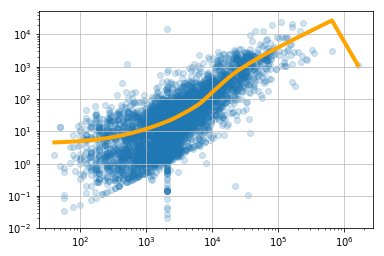

In [19]:
scatter_dicts(prot_brockmann, prot_paxdb)

In [20]:
df1 = pd.DataFrame.from_dict(prot_brockmann.items())
df1.columns = ['name', '$n_\mathrm{Brockmann}$']

df2 = pd.DataFrame.from_dict(prot_paxdb.items())
df2.columns = ['name', '$n_\mathrm{Wang integrated}$']

df3 = pd.DataFrame.from_dict(prot_paxdb2013.items())
df3.columns = ['name', '$n_\mathrm{Wang SC}$']

df4 = pd.DataFrame.from_dict(prot_chong.items())
df4.columns = ['name', '$n_\mathrm{Chong}$']

df5 = pd.DataFrame.from_dict(prot_arava.items())
df5.columns = ['name', '$n_\mathrm{Arava}$']

df6 = pd.DataFrame.from_dict(prot_siwiak.items())
df6.columns = ['name', '$n_\mathrm{Siwiak}$']

df7 = pd.DataFrame.from_dict(prot_weinberg.items())
df7.columns = ['name', '$n_\mathrm{Weinberg}$']

Build full outer join of the data frames:

In [21]:
df = pd.merge(df1, df2, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df3, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df4, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df5, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df6, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df7, left_on='name', right_on='name', how='outer')

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


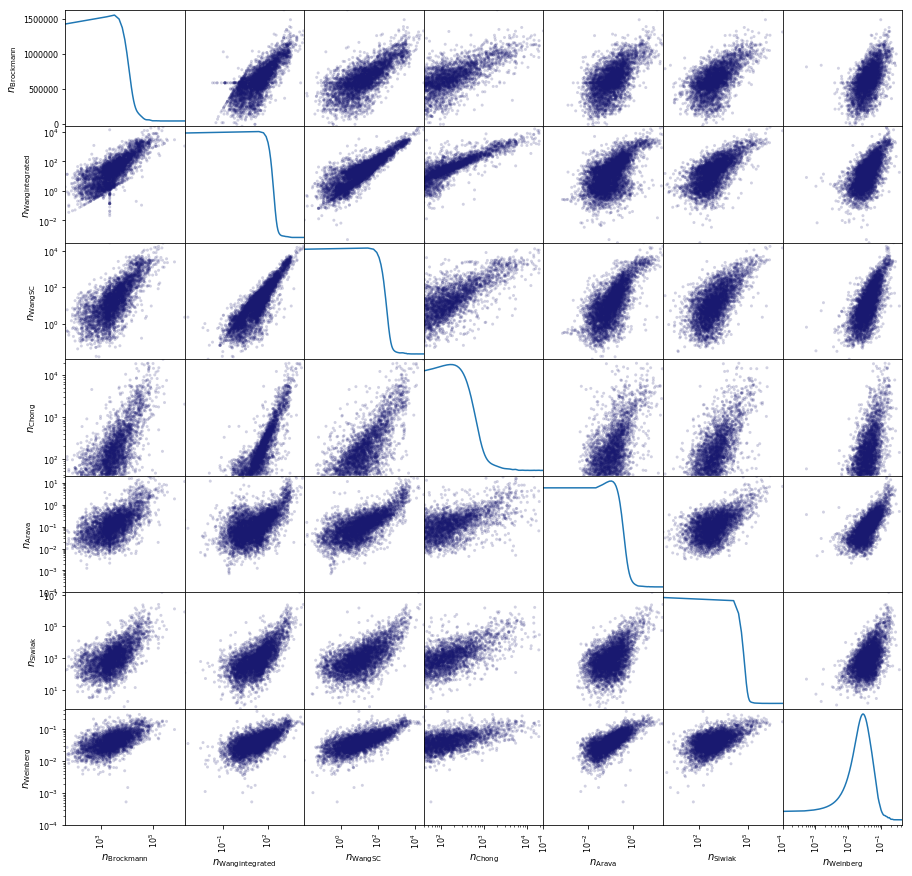

In [22]:
axl = pd.scatter_matrix(df, c='midnightblue', alpha=0.2, figsize=(15, 15), diagonal='kde')

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        mini = max(0.0001, df[df.columns[i+1]].min())
        minj = max(0.0001, df[df.columns[j+1]].min())
        if i != j:  # only the scatter plots
            # scale plot axes by their mins and maxs
            ax.set_xlim([minj, df[df.columns[j+1]].max()]) 
            ax.set_ylim([mini, df[df.columns[i+1]].max()])
            ax.set_xscale('log')
            ax.set_yscale('log')
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j+1]].max()])
            ax.set_xscale('log')            

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


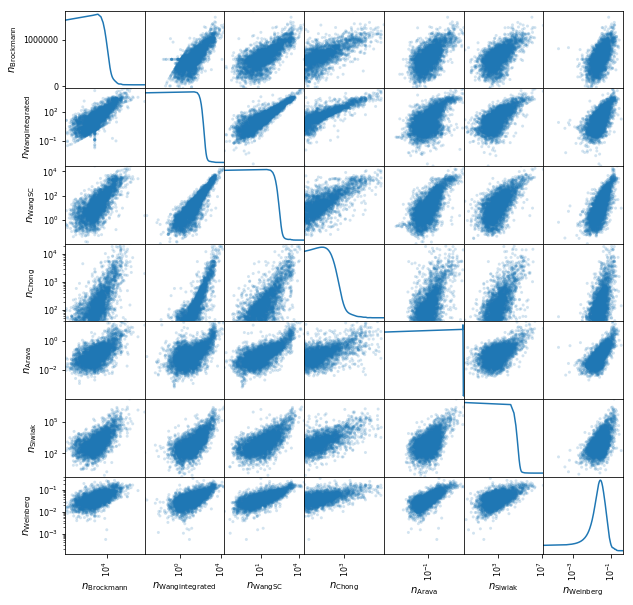

In [23]:
axl = pd.scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde', rasterized=True)

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        mini = df[df.columns[i+1]].min()
        minj = df[df.columns[j+1]].min()
        #ax.locator_params(tight=True, nbins=3)
        if i != j:  # only the scatter plots
            mini = max(0.00011, df[df.columns[i+1]].min())
            minj = max(0.00011, df[df.columns[j+1]].min())
            ax.set_xlim([minj, df[df.columns[j+1]].max()*0.99]) 
            ax.set_ylim([mini, df[df.columns[i+1]].max()*0.99])
            ax.set_xscale('log')
            ax.set_yscale('log')
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j+1]].max()])
            ax.set_xscale('log') 
            
plt.savefig('proteomes_scatter_matrix.pgf')

In [24]:
pkl.dump(prot_brockmann, open("../parameters/prot_brockmann.p", "wb"))
pkl.dump(prot_paxdb, open("../parameters/prot_paxdb.p", "wb"))
pkl.dump(prot_paxdb2013, open("../parameters/prot_paxdb2013.p", "wb"))
pkl.dump(prot_chong, open("../parameters/prot_chong.p", "wb"))
pkl.dump(prot_arava, open("../parameters/prot_arava.p", "wb"))
pkl.dump(prot_per_transcript_arava, open("../parameters/prot_per_transcript_arava.p", "wb"))
pkl.dump(prot_siwiak, open("../parameters/prot_siwiak.p", "wb"))
pkl.dump(prot_weinberg, open("../parameters/prot_weinberg.p", "wb"))

IOError: [Errno 2] No such file or directory: '../parameters/prot_brockmann.p'